<img src="https://upload.wikimedia.org/wikipedia/commons/8/89/TheNorthFace_logo.svg" height="300px">

Company's Description 📇

The North Face is an American outdoor recreation product company, founded in 1968 to supply climbers. The North Face produces clothing, footwear, and outdoor equipment. By the late 1990s customers had expanded beyond outdoor enthusiasts and in the 2000s it became a fashion style symbol.

# 1 - Preprocessing

In [26]:
# Scikit-learn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import en_core_web_sm
import spacy

# Import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import sys
sys.path.append(r'C:\Users\antoi\Documents\Work_Learn\JEDHA\M05-Supervised_ML\JEDHA-Projet')
from function import *


In [27]:
df = pd.read_csv('sample-data.csv')
df.isna().value_counts()

id     description
False  False          500
Name: count, dtype: int64

In [28]:
df.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [29]:
display(df['description'].iloc[1])

'Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93% polyester (71% recycled) fabric that\'s fast-wicking, dries quickly and has 7% spandex for stretch; the seamless waistband and soft leg edges won\'t roll or bind. The gusseted, flat-sewn 6" inseam (size M) is offset to prevent inner-thigh chafe. Fly-free with a smooth front panel. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Stretch mesh provides support, open-weave mesh for airflow, wicks efficiently, dries fast"</li> <li>Seamless construction</li> <li>"Flat-sewn, gusseted inseam is set forward to prevent inner-thigh chafe"</li> <li>Fly-free support</li> <li>"Inseam (size M) is 6"""</li></ul><br><br><b>Fabric: </b>"4.6-oz 93% polyester (71% recycled)/7% spandex, with moisture-wicking performance. Recyclable through the Common Threads Recycling Pr

'Active classic boxers - There\'s a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><br>Made in Mexico.'

In [30]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [31]:
# df['clean_descriptions'] = df['description'].str.replace(r"[^A-Za-z0-9 ]+", " ", regex = True)
df['clean_descriptions'] = df['description'].str.replace(r"[<[a-z/]+>]+", " ", regex = True)
df['clean_descriptions'] = df['description'].str.replace(r"\d+|<[a-z/]+>", " ", regex=True)
df['clean_descriptions'] = df['clean_descriptions'].fillna('').apply(lambda x: x.lower())
df.head()

,id,description,clean_descriptions
0,1,Active classic boxers - There's a reason why o...,active classic boxers - there's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs - skinning up glory ...
2,3,Active sport briefs - These superbreathable no...,active sport briefs - these superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc...","alpine guide pants - skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...","alpine wind jkt - on high ridges, steep ice an..."


In [32]:
from spacy.lang.en.stop_words import STOP_WORDS

tokenized_doc = df['clean_descriptions'].fillna('').apply(lambda x: nlp(x))

In [33]:
tokenized_doc = tokenized_doc.apply(lambda doc: [token.lemma_ for token in doc if token.text not in STOP_WORDS])
tokenized_doc

0      [active, classic, boxer, -, reason, boxer, cul...
1      [active, sport, boxer, brief, -, skin, glory, ...
2      [active, sport, brief, -, superbreathable, -, ...
3      [alpine, guide, pant, -, skin, ,, climb, ice, ...
4      [alpine, wind, jkt, -, high, ridge, ,, steep, ...
                             ...                        
495    [cap,   , bottom, -, cut, loose, madden, crowd...
496    [cap,   , crew, -, crew, take, edge, fickle, w...
497    [-, time, shell, -, need, use, morning, time, ...
498    [-, wear, cargo, short, -, -, wear, cargo, sho...
499    [-, wear, short, -, time, simplify, ?, -, wear...
Name: clean_descriptions, Length: 500, dtype: object

In [34]:
df["clean_documents_tokenized"] = tokenized_doc
df["clean_documents"] = tokenized_doc.apply(lambda x: ' '.join(x))
df

,id,description,clean_descriptions,clean_documents_tokenized,clean_documents
0,1,Active classic boxers - There's a reason why o...,active classic boxers - there's a reason why o...,"[active, classic, boxer, -, reason, boxer, cul...",active classic boxer - reason boxer cult favor...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs - skinning up glory ...,"[active, sport, boxer, brief, -, skin, glory, ...",active sport boxer brief - skin glory require ...
2,3,Active sport briefs - These superbreathable no...,active sport briefs - these superbreathable no...,"[active, sport, brief, -, superbreathable, -, ...",active sport brief - superbreathable - fly bri...
3,4,"Alpine guide pants - Skin in, climb ice, switc...","alpine guide pants - skin in, climb ice, switc...","[alpine, guide, pant, -, skin, ,, climb, ice, ...","alpine guide pant - skin , climb ice , switch ..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...","alpine wind jkt - on high ridges, steep ice an...","[alpine, wind, jkt, -, high, ridge, ,, steep, ...","alpine wind jkt - high ridge , steep ice alpin..."
...,...,...,...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...,cap bottoms - cut loose from the maddening c...,"[cap, , bottom, -, cut, loose, madden, crowd...",cap bottom - cut loose madden crowd search ...
496,497,Cap 2 crew - This crew takes the edge off fick...,cap crew - this crew takes the edge off fick...,"[cap, , crew, -, crew, take, edge, fickle, w...",cap crew - crew take edge fickle weather . ...
497,498,All-time shell - No need to use that morning T...,all-time shell - no need to use that morning t...,"[-, time, shell, -, need, use, morning, time, ...",- time shell - need use morning time umbrella ...
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...,all-wear cargo shorts - all-wear cargo shorts ...,"[-, wear, cargo, short, -, -, wear, cargo, sho...",- wear cargo short - - wear cargo short bask g...


# 2 - Clustering Model

In [35]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_documents'])
dense = X.toarray()
dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
print(sorted(vectorizer.vocabulary_.items())[:50])

[('abandon', 0), ('ability', 1), ('able', 2), ('abrasion', 3), ('abrasive', 4), ('abroad', 5), ('absolute', 6), ('absorb', 7), ('absorption', 8), ('abstract', 9), ('abuse', 10), ('abusive', 11), ('accentuate', 12), ('access', 13), ('accessibility', 14), ('accessory', 15), ('accommodate', 16), ('accomplish', 17), ('accord', 18), ('ace', 19), ('achieve', 20), ('achille', 21), ('act', 22), ('action', 23), ('active', 24), ('activity', 25), ('acutely', 26), ('adapt', 27), ('adaptability', 28), ('adaptable', 29), ('add', 30), ('addition', 31), ('additional', 32), ('adhere', 33), ('adjust', 34), ('adjustability', 35), ('adjustable', 36), ('adjusting', 37), ('adjustment', 38), ('adorn', 39), ('adour', 40), ('adours', 41), ('advance', 42), ('advanced', 43), ('advantage', 44), ('advantageous', 45), ('adventure', 46), ('aerial', 47), ('aesthetic', 48), ('affectionately', 49)]


In [37]:
tfid_df = pd.DataFrame(dense,columns=[x for x in vectorizer.get_feature_names_out()])

tfid_df

,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,zest,zinger,zip,zipped,zipper,zippered,zippers,zipping,zips,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.052045,0.273546,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.114701,0.040191,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.146544,0.0,0.000000,0.047321,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.064042,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [38]:
tfid_df = tfid_df.T
tfid_df["token"] = tfid_df.index

tfid_df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,token
abandon,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,abandon
ability,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,ability
able,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,able
abrasion,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,abrasion
abrasive,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,abrasive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zippered,0.0,0.0,0.0,0.273546,0.040191,0.0,0.240508,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.047321,0.0,0.0,zippered
zippers,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,zippers
zipping,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,zipping
zips,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,zips


In [39]:
tfid_df.sort_values(by=0, ascending=False)[:15]


,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,token
boxer,0.536032,0.356441,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.138436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,boxer
expose,0.268016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.138436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,expose
traditional,0.229261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,traditional
classic,0.179386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.089789,0.000000,classic
especially,0.165860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,especially
reason,0.165860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,reason
cult,0.155551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cult
situation,0.155551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,situation
brush,0.155486,0.000000,0.000000,0.068631,0.151255,0.055264,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.160624,0.148456,0.138306,0.000000,0.118725,0.000000,0.000000,brush
construction,0.154697,0.068579,0.080094,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.067354,0.000000,0.000000,0.000000,construction


# DBScan

In [40]:
nb_clust = []

for i in np.arange(0.1, 2, 0.1):
    for j in range(1, 100):
        eps, min_samples = i, j
        db = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
        db.fit(X)
        df['cluster'] = db.labels_
        len_clust = len(df['cluster'].value_counts())
        if len_clust>10 and len_clust<20 and len(df[df['cluster']==-1])<30:
            print(i,j)
            nb_clust.append((i,j))


In [41]:
eps,min_samples = 0.7,4
db = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
db.fit(X)
df['cluster'] = db.labels_
df['cluster'].value_counts()

df = df[df['cluster']!=-1]

In [42]:
import plotly.express as px

fig = px.bar(tfid_df.sort_values(by=0, ascending=False)[:15], x="token", y=0)

fig.update_layout(width=800)
fig.show()

CLUSTER  1


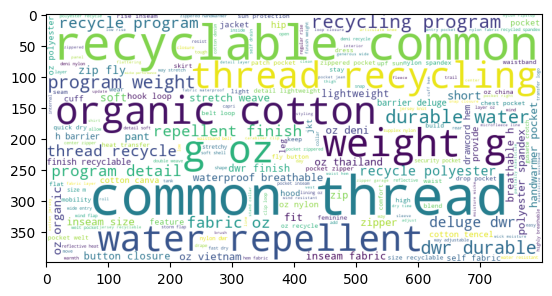

-----------
CLUSTER  0


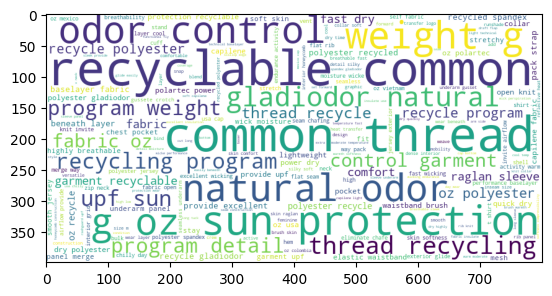

-----------
CLUSTER  5


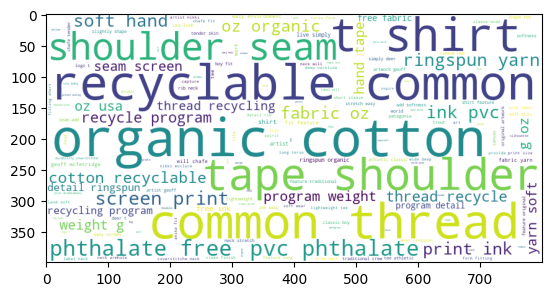

-----------
CLUSTER  2


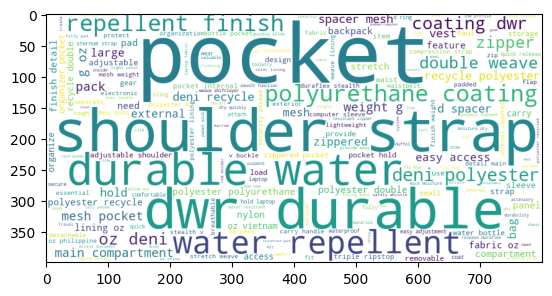

-----------
CLUSTER  8


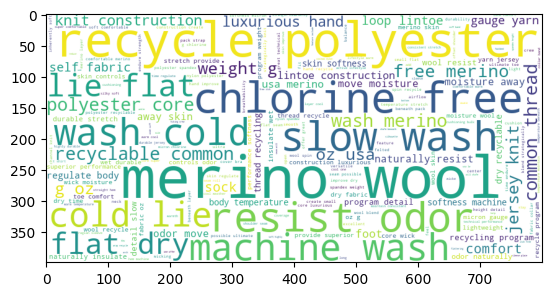

-----------


In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wd = WordCloud(width=800, height=400, background_color='white')

for c in df['cluster'].value_counts().index[:5] :
    print("CLUSTER ", c)
    texts = " ".join(df.loc[df['cluster']==c,'clean_documents'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    print('-----------')

# 3 - Recommender System 

In [48]:
def find_similar_items(item_id):
    """
    Return 5 product ids belonging to the same cluster as item_id
    """
    cluster_id = df.loc[df['id']==item_id, 'cluster'].values[0]
    similar_items = df.loc[df['cluster']==cluster_id,:].sample(5)
    similar_item_ids = similar_items['id'].unique()
    return similar_item_ids

In [51]:
class bcolors:
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'

product_id = int(input("What product would you like to buy ? "))
print()
try:
    item_desc = df.loc[df['id']==product_id, 'clean_descriptions'].values[0]
except:
    print('Product not found in database. Please enter a valid product id (>0).')
else:
    print(f"{bcolors.OKBLUE}Product found in database, description below :")
    print(item_desc)
    print()
    
    print("Based on the analysis of the products' descriptions, you might also be interested by the following products : ")
    print()

    for i in find_similar_items(product_id):
        print(f"{bcolors.OKGREEN}Item #", i)
        print(df.loc[df['id']==i, 'clean_descriptions'].values[0])
        print('--------------------')



Product found in database, description below :
baby sun bucket hat - this hat goes on when the sun rises above the horizon, and stays on when raindrops start falling. its made from an ultra-durable  -ply,  . -oz supplex nylon fabric with a dwr (durable water repellent) finish, and reverses to either a contrasting solid color or print. a soft tuck-away chin strap with a hook-and-loop fastener holds securely without chafing young jawlines. packs small; easy care.   details:    "lightweight supplex nylon is soft, dries fast and packs small; easy care"   brim shields head and neck   chin strap with hook-and-loop fastener can be tucked away when not in use   reversible style with fun print/solid combinations   one colorway has print on both sides     fabric:  " -ply,  . -oz supplex nylon with a dwr (durable water repellent) finish"   weight:  (  g  .  oz)  made in china.

Based on the analysis of the products' descriptions, you might also be interested by the following products : 

Item # 

# 4 - LSA for topic extraction

In [52]:
svd_model = TruncatedSVD(n_components=12) # We test on 12 topics
lsa = svd_model.fit_transform(X)
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_" + str(i) for i in range(lsa.shape[1])])
topic_encoded_df["documents"] = df['clean_descriptions']
topic_encoded_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents
0,0.270827,-0.046377,0.186650,0.098852,-0.119082,0.006150,-0.084607,-0.013195,-0.149634,-0.040886,-0.010747,-0.029049,active classic boxers - there's a reason why o...
1,0.289567,-0.060242,0.096769,0.106402,-0.022372,0.154264,-0.024187,-0.013942,-0.119353,-0.106902,-0.037909,0.032848,active sport boxer briefs - skinning up glory ...
2,0.280589,-0.085797,0.107441,0.030882,-0.025688,0.134863,0.073938,0.069714,-0.090011,-0.038535,-0.031932,0.094372,active sport briefs - these superbreathable no...
3,0.400904,-0.260825,-0.132706,-0.144906,0.049608,0.000554,-0.047775,-0.106592,-0.032599,-0.150169,-0.010048,-0.143025,"alpine guide pants - skin in, climb ice, switc..."
4,0.402918,-0.273955,-0.026492,-0.250872,-0.035638,-0.064026,0.032185,0.014876,0.073794,-0.168719,0.018596,-0.262163,"alpine wind jkt - on high ridges, steep ice an..."


In [53]:
def extract_main_topics(x):
    """
    Return the main topic for each document. The main topic is that have the maximum value for each line
    """
    topics = np.abs(x)
    main_topic = topics.sort_values(ascending=False).index[0]
    return main_topic

# Initialize column main_topics with 0
topic_encoded_df.loc[:, 'main_topic'] = 0

for i, row in topic_encoded_df.iloc[:,:-2].iterrows():
    topic_encoded_df.loc[i, 'main_topic'] = extract_main_topics(row)

topic_encoded_df.head()

C:\Users\antoi\AppData\Local\Temp\ipykernel_33556\3040406549.py:13: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'topic_0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents,main_topic
0,0.270827,-0.046377,0.186650,0.098852,-0.119082,0.006150,-0.084607,-0.013195,-0.149634,-0.040886,-0.010747,-0.029049,active classic boxers - there's a reason why o...,topic_0
1,0.289567,-0.060242,0.096769,0.106402,-0.022372,0.154264,-0.024187,-0.013942,-0.119353,-0.106902,-0.037909,0.032848,active sport boxer briefs - skinning up glory ...,topic_0
2,0.280589,-0.085797,0.107441,0.030882,-0.025688,0.134863,0.073938,0.069714,-0.090011,-0.038535,-0.031932,0.094372,active sport briefs - these superbreathable no...,topic_0
3,0.400904,-0.260825,-0.132706,-0.144906,0.049608,0.000554,-0.047775,-0.106592,-0.032599,-0.150169,-0.010048,-0.143025,"alpine guide pants - skin in, climb ice, switc...",topic_0
4,0.402918,-0.273955,-0.026492,-0.250872,-0.035638,-0.064026,0.032185,0.014876,0.073794,-0.168719,0.018596,-0.262163,"alpine wind jkt - on high ridges, steep ice an...",topic_0


In [54]:
topic_encoded_df['main_topic'].value_counts()


main_topic
topic_0     258
topic_1      61
topic_2      35
topic_6      31
topic_7      30
topic_3      19
topic_4      15
topic_8      14
topic_11     11
topic_5      11
topic_10      8
topic_9       7
Name: count, dtype: int64

In [56]:
topics_description = pd.DataFrame(svd_model.components_, columns = vectorizer.get_feature_names_out(), 
                                  index = ['topic_' + str(i) for i in range(svd_model.components_.shape[0])])

# Compute absolute values of coefficients
topics_description = topics_description.apply(np.abs, axis = 1)

# Each word is map with a score of relevance for each topic
topics_description.head()

,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,zest,zinger,zip,zipped,zipper,zippered,zippers,zipping,zips,zone
topic_0,0.001144,0.002341,0.000380,0.019382,0.000811,0.000888,0.000919,0.001259,0.001347,0.001292,...,0.001126,0.000617,0.087499,0.000901,0.086771,0.071416,0.001411,0.001797,0.007201,0.007318
topic_1,0.000534,0.000913,0.000404,0.022875,0.000714,0.000879,0.000692,0.001754,0.001450,0.003759,...,0.001488,0.000806,0.053336,0.001012,0.097890,0.081412,0.002264,0.002573,0.009650,0.010279
topic_2,0.003547,0.006357,0.000046,0.018778,0.000100,0.000123,0.002250,0.001108,0.000539,0.000488,...,0.000315,0.000744,0.069929,0.000419,0.043055,0.065096,0.001740,0.001913,0.006306,0.000009
topic_3,0.000587,0.000376,0.000071,0.012991,0.000905,0.002014,0.000410,0.003346,0.000129,0.002106,...,0.002803,0.000772,0.089656,0.001008,0.115835,0.068188,0.004442,0.004694,0.015348,0.015968
topic_4,0.004539,0.009406,0.000700,0.015926,0.000620,0.000303,0.001884,0.000738,0.000172,0.000047,...,0.000555,0.000341,0.016591,0.000080,0.013124,0.016094,0.000827,0.000689,0.001545,0.018625


In [57]:
for i,row in topics_description.iterrows():
    print('TOPIC :', i)
    print(row.sort_values(ascending=False)[0:5].index.tolist())
    print()
    print('-------------------------')
    print()

TOPIC : topic_0
['pocket', 'oz', 'organic', 'cotton', 'recyclable']

-------------------------

TOPIC : topic_1
['organic', 'cotton', 'shirt', 'print', 'ringspun']

-------------------------

TOPIC : topic_2
['merino', 'odor', 'pocket', 'wool', 'control']

-------------------------

TOPIC : topic_3
['inseam', 'organic', 'cotton', 'button', 'short']

-------------------------

TOPIC : topic_4
['merino', 'wool', 'wash', 'sun', 'control']

-------------------------

TOPIC : topic_5
['nylon', 'spandex', 'organic', 'sun', 'cotton']

-------------------------

TOPIC : topic_6
['spandex', 'coverage', 'inseam', 'tencel', 'pocket']

-------------------------

TOPIC : topic_7
['strap', 'waterproof', 'mesh', 'barrier', 'polyurethane']

-------------------------

TOPIC : topic_8
['sun', 'upf', 'protection', 'collar', 'control']

-------------------------

TOPIC : topic_9
['fleece', 'waterproof', 'barrier', 'sun', 'protection']

-------------------------

TOPIC : topic_10
['photo', 'poster', 'outsi

-------------------------

TOPIC  topic_0


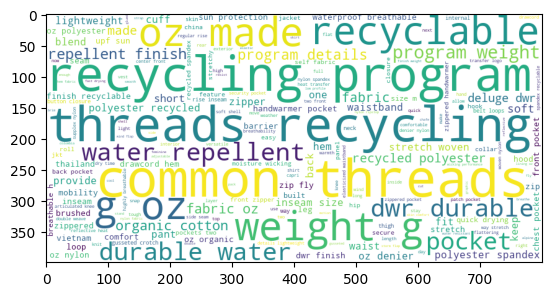

-------------------------

TOPIC  topic_1


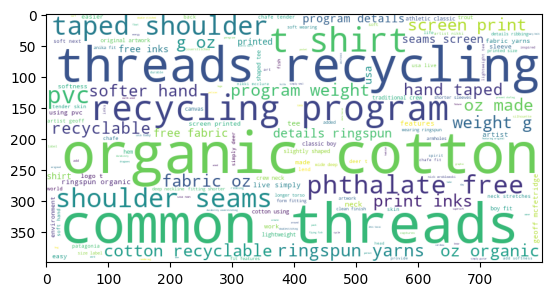

-------------------------

TOPIC  topic_2


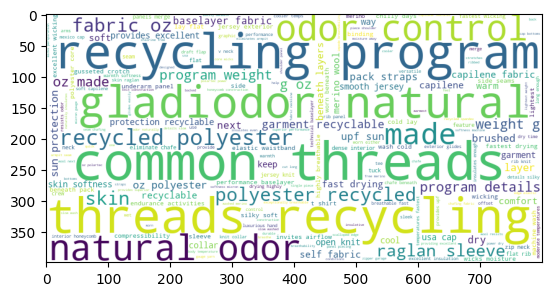

-------------------------

TOPIC  topic_3


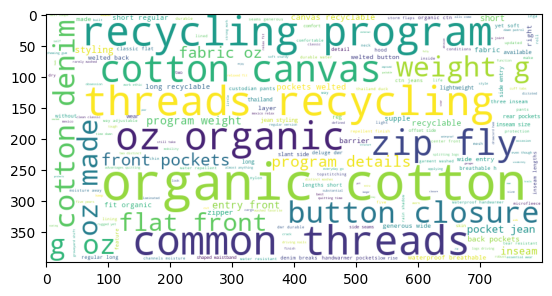

-------------------------

TOPIC  topic_4


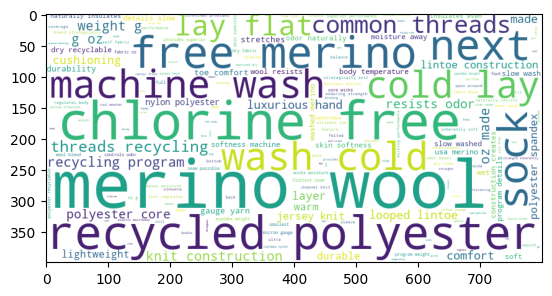

In [61]:
cols = [c for c in topic_encoded_df.columns if 'topic_' in c]

for t in cols[:5]:
    print('-------------------------')
    print()
    print('TOPIC ', t)
    
    # Handle topics that are not main topics for any document in the corpus
    if (topic_encoded_df['main_topic']==t).any() == False:
        print('cannot create wordcloud for this topic')
        continue
    
    # Convert 'documents' column to strings and join them
    texts = " ".join(topic_encoded_df.loc[topic_encoded_df['main_topic']==t, 'documents'].astype(str))
    
    # Generate word cloud
    cloud = wd.generate(texts)
    
    # Display word cloud
    plt.imshow(cloud)
    plt.show()


# Sources

https://www.kaggle.com/code/pierrelouisdanieau/nlp-clustering-recommender-system-lsa

https://stellargraph.readthedocs.io/en/stable/demos/embeddings/node2vec-embeddings.html